# IMPORTS

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Nesta seção do notebook, exploraremos várias técnicas de análise não supervisionadas para obter insights sobre as relações entre os recursos no nosso dataset. Começaremos pela  correlação entre os recursos usando um gráfico  de correlação. A seguir, iremos utilizar a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados e identificar as características mais importantes. Posteriormente, utilizaremos o t-SNE para visualizar os dados de alta dimensão em um espaço bidimensional. Por fim, o algoritmo de agrupamento K-Means para agrupar pontos de dados semelhantes e identificar quaisquer padrões subjacentes nos dados.

In [49]:
path="C:\\Users\\guilh\\OneDrive - Universidade de Aveiro\\Guilherme\\dataset.csv"
data=pd.read_csv(path)

In [50]:
data

,Y,drug1 MolWt,drug1 HeavyAtomMolWt,drug1 ExactMolWt,drug1 BertzCT,drug1 TPSA,morgan drug1 15,morgan drug1 33,morgan drug1 36,morgan drug1 64,...,Parametro 8775,Parametro 8776,Parametro 8777,Parametro 8778,Parametro 8779,Parametro 8780,Parametro 8781,Parametro 8782,Parametro 8783,Parametro 8784
0,7.693530,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.933708,0.433194,-0.705877,-0.797751,0.494978,-0.239587,1.279730,0.691891,-0.982503,-0.364565
1,7.778053,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.453011,0.868781,-0.548668,1.191511,0.947887,0.393898,1.241226,1.139293,-1.070203,-0.425415
2,-1.198505,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-0.367088,-0.495932,-0.639091,-0.346006,-0.034777,-1.268040,-0.277364,-0.423137,-1.065120,-1.002490
3,2.595684,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.852838,-0.152449,-0.653551,0.369509,-0.358118,1.586969,1.275677,0.621267,-0.365272,-0.818869
4,-5.139971,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-1.854093,-2.383995,0.068724,-0.583244,-2.238896,-1.288220,-1.650908,-1.705543,-0.714340,0.635244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,10.223066,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.989373,0.598182,-0.708544,-0.494359,-0.540534,-0.977627,-0.762502,0.882945,-1.073682,0.481022
19862,20.551627,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19863,12.190316,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19864,23.438547,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.345755,0.172750,-0.672222,-0.729491,0.774517,0.535449,0.406174,-0.436593,1.207464,-1.522136


o nosso objetivo ser aidentificar as colunas cujo nome não é parametro e analisar a correlção entre um subgrupo das mesmas e a variavel Y.
Para a escolha desse subgrupo iremos selecionar as que tem maior variancia top 10

In [51]:

colunas_sem_parametro = [coluna for coluna in data.columns if 'parametro' not in coluna.lower()]

numero_colunas_sem_parametro = len(colunas_sem_parametro)

print("Colunas sem o nome 'parametro':", colunas_sem_parametro)
print("Número de colunas sem o nome 'parametro':", numero_colunas_sem_parametro)


Colunas sem o nome 'parametro': ['Y', 'drug1 MolWt', 'drug1 HeavyAtomMolWt', 'drug1 ExactMolWt', 'drug1 BertzCT', 'drug1 TPSA', 'morgan drug1 15', 'morgan drug1 33', 'morgan drug1 36', 'morgan drug1 64', 'morgan drug1 80', 'morgan drug1 90', 'morgan drug1 102', 'morgan drug1 119', 'morgan drug1 121', 'morgan drug1 128', 'morgan drug1 130', 'morgan drug1 138', 'morgan drug1 147', 'morgan drug1 175', 'morgan drug1 222', 'morgan drug1 233', 'morgan drug1 250', 'morgan drug1 301', 'morgan drug1 305', 'morgan drug1 314', 'morgan drug1 333', 'morgan drug1 361', 'morgan drug1 378', 'morgan drug1 389', 'morgan drug1 428', 'morgan drug1 433', 'morgan drug1 456', 'morgan drug1 463', 'morgan drug1 486', 'morgan drug1 512', 'morgan drug1 656', 'morgan drug1 679', 'morgan drug1 694', 'morgan drug1 695', 'morgan drug1 726', 'morgan drug1 787', 'morgan drug1 807', 'morgan drug1 831', 'morgan drug1 841', 'morgan drug1 875', 'morgan drug1 881', 'morgan drug1 893', 'morgan drug1 904', 'morgan drug1 926'

In [52]:
subdataset = data[colunas_sem_parametro]

# Exibir informações sobre o novo DataFrame
print("Shape do subdataset:", subdataset.shape)

Shape do subdataset: (19866, 113)


In [53]:
variancia_por_coluna = subdataset.var()

# Classificar as colunas com base na variância em ordem decrescente
colunas_top10_variancia = variancia_por_coluna.sort_values(ascending=False).head(10)

# Exibir informações sobre as top 10 colunas com maior variância
print("Top 10 colunas com maior variância:")
print(colunas_top10_variancia)

Top 10 colunas com maior variância:
Y                       511.258662
drug1 BertzCT             2.641793
drug2 BertzCT             1.100362
drug1 TPSA                0.739487
drug1 MolWt               0.659687
drug1 ExactMolWt          0.654969
drug1 HeavyAtomMolWt      0.547122
drug2 MolWt               0.512020
drug2 ExactMolWt          0.511113
drug2 HeavyAtomMolWt      0.437069
dtype: float64


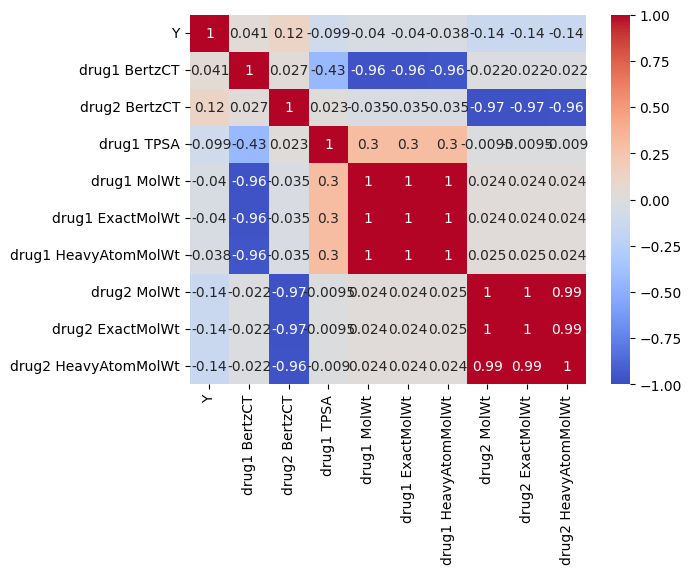

In [54]:
subdataset_top10_variancia = data[colunas_top10_variancia.index]
features_corr=subdataset_top10_variancia.corr()
sns.heatmap(features_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# plot
plt.show()

Os resultado do heat_map de correlações paresentam uma clara correlação positiva entre as features de HeavyAtomMolWt, MolWt e ExactMolWT, com valores muito proximos de 1 . Como estas features estão todas realacionadas com o peso molecular, seria algo expectável de se verificar.

Em relação à variavel independente nao se observa nenhuma correlação positiva criada, mas certamente iremos explorar mais este assunto quando exploramos os modelos de ML e featues que maior peso têm nesses modelos

# Redução de dimensionalidade

__PCA__

Após a seleção das features, procedeu-se à redução de dimensionalidade do dataframe resultante ("data"), de modo a obter um conjunto menor e independente de variáveis chamadas de componentes principais.
O PCA foi realizado para uma redução de até três PCs que explicam 85% da variância dos dados. Os dados obtidos podem ser visualizados no gráfico bidimensional que utiliza os dois componentes principais como eixo.



In [58]:
data

,Y,drug1 MolWt,drug1 HeavyAtomMolWt,drug1 ExactMolWt,drug1 BertzCT,drug1 TPSA,morgan drug1 15,morgan drug1 33,morgan drug1 36,morgan drug1 64,...,Parametro 8775,Parametro 8776,Parametro 8777,Parametro 8778,Parametro 8779,Parametro 8780,Parametro 8781,Parametro 8782,Parametro 8783,Parametro 8784
0,7.693530,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.933708,0.433194,-0.705877,-0.797751,0.494978,-0.239587,1.279730,0.691891,-0.982503,-0.364565
1,7.778053,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.453011,0.868781,-0.548668,1.191511,0.947887,0.393898,1.241226,1.139293,-1.070203,-0.425415
2,-1.198505,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-0.367088,-0.495932,-0.639091,-0.346006,-0.034777,-1.268040,-0.277364,-0.423137,-1.065120,-1.002490
3,2.595684,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.852838,-0.152449,-0.653551,0.369509,-0.358118,1.586969,1.275677,0.621267,-0.365272,-0.818869
4,-5.139971,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-1.854093,-2.383995,0.068724,-0.583244,-2.238896,-1.288220,-1.650908,-1.705543,-0.714340,0.635244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,10.223066,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.989373,0.598182,-0.708544,-0.494359,-0.540534,-0.977627,-0.762502,0.882945,-1.073682,0.481022
19862,20.551627,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19863,12.190316,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19864,23.438547,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.345755,0.172750,-0.672222,-0.729491,0.774517,0.535449,0.406174,-0.436593,1.207464,-1.522136


In [60]:
dados_sem_Y=data.drop("Y",axis=1)

,drug1 MolWt,drug1 HeavyAtomMolWt,drug1 ExactMolWt,drug1 BertzCT,drug1 TPSA,morgan drug1 15,morgan drug1 33,morgan drug1 36,morgan drug1 64,morgan drug1 80,...,Parametro 8775,Parametro 8776,Parametro 8777,Parametro 8778,Parametro 8779,Parametro 8780,Parametro 8781,Parametro 8782,Parametro 8783,Parametro 8784
0,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,0.0,...,0.933708,0.433194,-0.705877,-0.797751,0.494978,-0.239587,1.279730,0.691891,-0.982503,-0.364565
1,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,0.0,...,0.453011,0.868781,-0.548668,1.191511,0.947887,0.393898,1.241226,1.139293,-1.070203,-0.425415
2,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,0.0,...,-0.367088,-0.495932,-0.639091,-0.346006,-0.034777,-1.268040,-0.277364,-0.423137,-1.065120,-1.002490
3,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,0.0,...,0.852838,-0.152449,-0.653551,0.369509,-0.358118,1.586969,1.275677,0.621267,-0.365272,-0.818869
4,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,0.0,...,-1.854093,-2.383995,0.068724,-0.583244,-2.238896,-1.288220,-1.650908,-1.705543,-0.714340,0.635244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,1.0,...,0.989373,0.598182,-0.708544,-0.494359,-0.540534,-0.977627,-0.762502,0.882945,-1.073682,0.481022
19862,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19863,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,1.0,...,0.159920,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856
19864,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,1.0,...,0.345755,0.172750,-0.672222,-0.729491,0.774517,0.535449,0.406174,-0.436593,1.207464,-1.522136


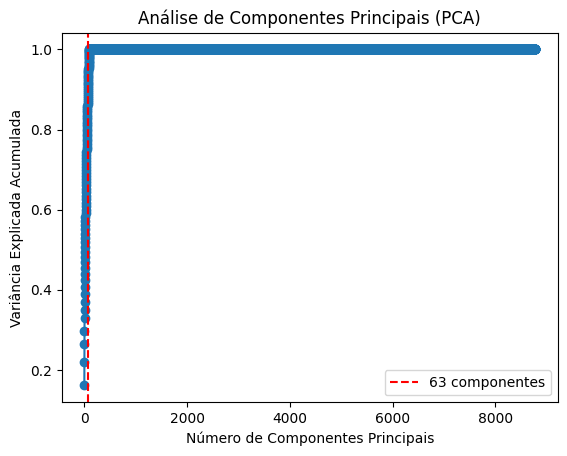

Número de componentes necessários para 86% da variância explicada: 63


In [21]:
pca = PCA()

# Aplicar PCA ao subdataset
pca_resultados = pca.fit_transform(dados_sem_Y)

# Calcular a porcentagem acumulada da variância explicada por cada componente
variabilidade_explicada = pca.explained_variance_ratio_.cumsum()

# Determinar o número de componentes necessários para explicar 85% da variância
numero_componentes_85_variancia = (variabilidade_explicada >= 0.85).argmax() + 1

# Visualizar a variabilidade explicada por cada componente
plt.plot(range(1, len(variabilidade_explicada) + 1), variabilidade_explicada, marker='o')
plt.axvline(x=numero_componentes_85_variancia, color='r', linestyle='--', label=f'{numero_componentes_85_variancia} componentes')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Componentes Principais (PCA)')
plt.legend()
plt.show()

# Exibir o número de componentes necessários
print(f"Número de componentes necessários para 86% da variância explicada: {numero_componentes_85_variancia}")

In [61]:
pca = PCA(n_components=60)
pca.fit(dados_sem_Y)

# determinar var
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
print('Soma:', sum(pca.explained_variance_ratio_) * 100, '%')


Var. explicada: [0.17037027 0.04562242 0.03767946 0.03303111 0.02282072 0.02065224
 0.02044055 0.01907241 0.01770098 0.01711254 0.01634439 0.0145578
 0.01428147 0.01354289 0.01293378 0.01282197 0.01191208 0.0115019
 0.0112221  0.01064334 0.0106204  0.01043269 0.01005379 0.00995136
 0.00966556 0.0096122  0.00924463 0.00914818 0.00905825 0.0089933
 0.0088563  0.00874568 0.00852903 0.00828629 0.00813589 0.00809215
 0.00807223 0.00783008 0.00781014 0.00770099 0.00753464 0.00730956
 0.00724611 0.00710094 0.00700364 0.00694317 0.00690221 0.00676794
 0.00674444 0.00670653 0.00653606 0.00644448 0.00631749 0.00629573
 0.00606889 0.0059521  0.00592536 0.00585427 0.00578683 0.00563678]
Soma: 84.41807400609595 %


Decidimos ficar com 60 PC , que representam aproximadamente 85 % da variância dos dados.

Os dados obtidos podem ser visualizados no gráfico bidimensional que utiliza os dois componentes principais como eixo.

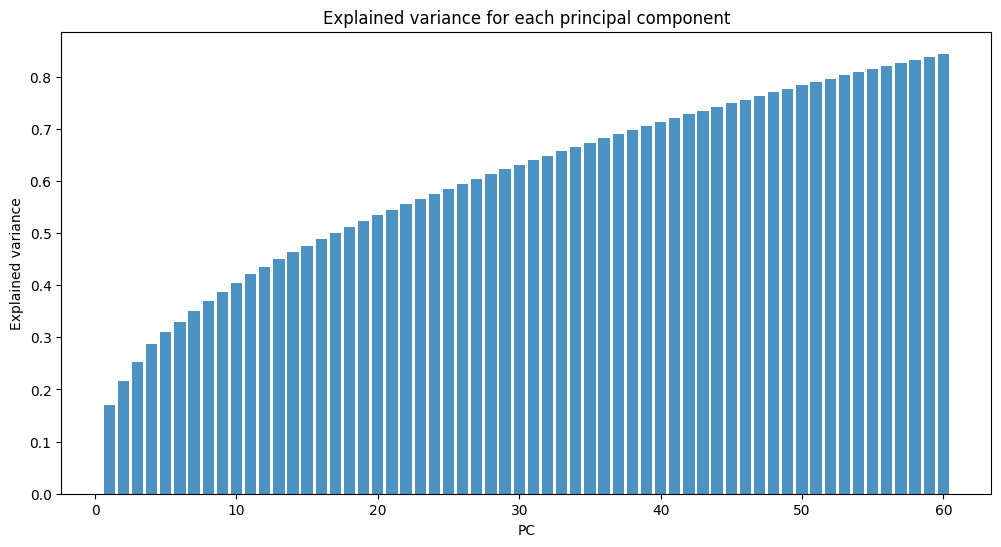

In [62]:
import numpy as np
componentes = np.arange(1, 61)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(componentes, cumulative_variance_ratio, alpha=0.8, align='center')
plt.xlabel('PC')
plt.ylabel('Explained variance')
plt.title('Explained variance for each principal component')
plt.show()

In [42]:
dados_sem_Y['Y_bin'] = np.where(data['Y'] > 0, 1, 0)
dados_sem_Y

,Y,drug1 MolWt,drug1 HeavyAtomMolWt,drug1 ExactMolWt,drug1 BertzCT,drug1 TPSA,morgan drug1 15,morgan drug1 33,morgan drug1 36,morgan drug1 64,...,Parametro 8776,Parametro 8777,Parametro 8778,Parametro 8779,Parametro 8780,Parametro 8781,Parametro 8782,Parametro 8783,Parametro 8784,Y_bin
0,7.693530,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.433194,-0.705877,-0.797751,0.494978,-0.239587,1.279730,0.691891,-0.982503,-0.364565,1
1,7.778053,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,0.868781,-0.548668,1.191511,0.947887,0.393898,1.241226,1.139293,-1.070203,-0.425415,1
2,-1.198505,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-0.495932,-0.639091,-0.346006,-0.034777,-1.268040,-0.277364,-0.423137,-1.065120,-1.002490,0
3,2.595684,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-0.152449,-0.653551,0.369509,-0.358118,1.586969,1.275677,0.621267,-0.365272,-0.818869,1
4,-5.139971,4.552044,4.441072,4.549836,11.258666,2.190289,0.0,0.0,0.0,0.0,...,-2.383995,0.068724,-0.583244,-2.238896,-1.288220,-1.650908,-1.705543,-0.714340,0.635244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19861,10.223066,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.598182,-0.708544,-0.494359,-0.540534,-0.977627,-0.762502,0.882945,-1.073682,0.481022,1
19862,20.551627,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856,1
19863,12.190316,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.157617,2.134676,2.314793,0.981662,-0.019900,0.278455,-0.374227,-0.073559,-0.217856,1
19864,23.438547,5.948467,5.475267,5.944298,8.967280,1.585104,0.0,0.0,0.0,1.0,...,0.172750,-0.672222,-0.729491,0.774517,0.535449,0.406174,-0.436593,1.207464,-1.522136,1


Decidimos verificar a representação gráfica , tendo em conta as 3 PC. Para isso acrecentamos ao dataset a coluna y_bin onde os valores de y maiores que 0 teriam valor 1 e menor que 0 valor 0.

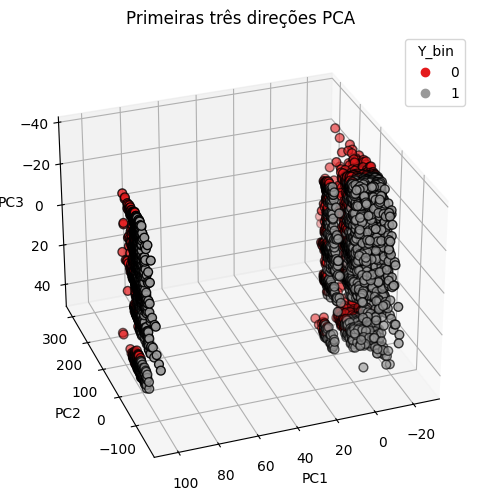

In [43]:
pca = PCA(n_components=60)
pca.fit(dados_sem_Y)
pca_scores = pca.transform(dados_sem_Y)[:, :3]

# Criar um gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Scatter plot com PC1, PC2 e PC3, colorido pela variável binarizada Y
scatter = ax.scatter(
    pca_scores[:, 0],
    pca_scores[:, 1],
    pca_scores[:, 2],
    c=dados_sem_Y['Y_bin'],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# Adicionar rótulos aos eixos
ax.set_title("Primeiras três direções PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Adicionar uma legenda para os valores binarizados
legend = ax.legend(*scatter.legend_elements(), title="Y_bin")

No gráfico PCA em 3 dimensoes, podemos observar que não há uma clara separação , indicando que a partir dos dados inseridos, não existem diferenças claras que permitam distinguir os compostos.Desta forma uma solução seria a representar num gráfico de maior dimensionalidade , mas ficaria dificil para a perceção humana a interpretação.



Cada linha na matriz pca.components_ representa um componente principal, e cada coluna representa uma feature. O valor em cada posição representa o peso da feature no componente principal correspondente.

Para ter uma ideia de quais serão features mais associadas a cada PC, examinaram-se os valores dos pesos das features em cada linha. As features com os valores absolutos mais altos numa determinada linha são aquelas que contribuem mais para esse componente principal.

In [65]:
# nomes das features
feature_names = list(dados_sem_Y.columns.values)


for i, pc in enumerate(pca.components_):
    print(f"Principal component {i+1}:")
    
    # obter pesos das features
    pc_weights = dict(zip(feature_names, pc))
    
    # ordenar features pelo peso
    pc_weights_sorted = sorted(pc_weights.items(), key=lambda x: abs(x[1]), reverse=True)
    
    # top 5 features
    for j in range(20):
        feature, weight = pc_weights_sorted[j]
        print(f"\t{feature}: {weight:.3f}")
    
    print()

Principal component 1:
	Parametro 5871: 0.026
	Parametro 6296: 0.026
	Parametro 5958: 0.026
	Parametro 5503: 0.026
	Parametro 6591: 0.026
	Parametro 8709: 0.026
	Parametro 6203: 0.026
	Parametro 7690: 0.026
	Parametro 6461: 0.026
	Parametro 8409: 0.026
	Parametro 6326: 0.026
	Parametro 8656: 0.026
	Parametro 6677: 0.026
	Parametro 7845: 0.026
	Parametro 7591: -0.026
	Parametro 5415: 0.026
	Parametro 6086: 0.026
	Parametro 7600: -0.026
	Parametro 5587: 0.026
	Parametro 7541: 0.026

Principal component 2:
	Parametro 1941: 0.049
	Parametro 2394: 0.049
	Parametro 2393: 0.049
	Parametro 1902: 0.048
	Parametro 1705: 0.048
	Parametro 2380: 0.048
	Parametro 2235: 0.048
	Parametro 1635: 0.048
	Parametro 1783: 0.048
	Parametro 2325: 0.048
	Parametro 1708: 0.048
	Parametro 2399: 0.048
	Parametro 1791: 0.048
	Parametro 1887: 0.048
	Parametro 2193: 0.048
	Parametro 1911: 0.048
	Parametro 1878: 0.048
	Parametro 7: 0.048
	Parametro 1870: 0.048
	Parametro 1755: 0.048

Principal component 3:
	Parametro